In [1]:
#!pip install DeepFace
from deepface import DeepFace
from skimage import io
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
from sklearn import metrics

In [4]:
races = []
for i in images:
  obj = DeepFace.analyze(img_path = i, actions = ['race'])
  print(obj["dominant_race"])
  races.append(obj["dominant_race"])

print(races)

race_model_single_batch.h5 will be downloaded...
Access denied with the following error:



 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1nz-WDhghGQBC4biwShQ9kYjvQMpO6smj 



white
latino hispanic
asian
white
['white', 'latino hispanic', 'asian', 'white']


In [2]:
path = "/Users/ninahorstmann/Downloads/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)

Total samples: 23708


In [6]:
images = []
ages = []
race = []
for file in files:
    image = cv2.imread(path+file,3)
    b,g,r = cv2.split(image)           # get b, g, r
    rgbimage = cv2.merge([r,g,b])     # switch it to r, g, b
    images.append(rgbimage)
    split_var = file.split('_')
    ages.append(split_var[0])
    race.append(split_var[2])

In [18]:
#count demographic spread of UTK-Face race labels
whitecount = 0
blackcount = 0
asiancount = 0
indiancount = 0
othercount = 0
race_txt = []
for i in race:
    #i = int(i)
    if i == '0':
        whitecount+=1
        race_txt.append('white')
    if i == '1':
        blackcount+=1
        race_txt.append('black')
    if i == '2':
        asiancount+=1
        race_txt.append('asian')
    if i == '3':
        indiancount+=1
        race_txt.append('indian')
    if i == '4':
        othercount+=1
        race_txt.append('other')
        

Age: 8 Race: white


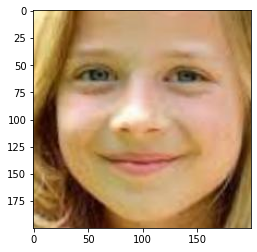

In [8]:
#Display a random sample

idx = np.random.randint(0, len(images))
sample = images[idx]
print("Age:",ages[idx], "Race:", race_txt[idx])
plt.imshow(sample)

In [ ]:
#Isolate images labeled as 'other'
other = np.where(np.array(race)=='4')[0]
other_images = [images[i] for i in other]

In [107]:
#Race detection using DeepFace for all samples
races = []
for i in images: 
    obj = DeepFace.analyze(img_path = i, actions = ['race'], enforce_detection=False)
    #print(obj["dominant_race"], race[i])
    races.append(obj["dominant_race"])

print(races)

['white', 'black', 'white', 'white', 'asian', 'white', 'white', 'latino hispanic', 'indian', 'white', 'white', 'white', 'white', 'latino hispanic', 'black', 'asian', 'white', 'indian', 'white', 'latino hispanic', 'white', 'white', 'white', 'white', 'middle eastern', 'white', 'black', 'white', 'white', 'asian', 'asian', 'asian', 'white', 'white', 'middle eastern', 'white', 'white', 'indian', 'white', 'black', 'white', 'white', 'white', 'white', 'black', 'white', 'black', 'white', 'latino hispanic', 'white', 'white', 'white', 'middle eastern', 'latino hispanic', 'white', 'black', 'indian', 'white', 'indian', 'asian', 'white', 'asian', 'white', 'black', 'asian', 'asian', 'white', 'white', 'black', 'white', 'white', 'white', 'indian', 'white', 'asian', 'white', 'white', 'white', 'black', 'white', 'white', 'white', 'white', 'white', 'white', 'black', 'black', 'white', 'white', 'asian', 'white', 'white', 'white', 'indian', 'white', 'white', 'white', 'white', 'white', 'latino hispanic', 'whit

In [41]:
#Race detection using DeepFace only for races labeled 'other'
race_other_images = []
for i in other_images: 
    obj = DeepFace.analyze(img_path = i, actions = ['race'], enforce_detection=False)
    #print(obj["dominant_race"])
    race_other_images.append(obj["dominant_race"])

print(race_other_images)

['white', 'latino hispanic', 'black', 'latino hispanic', 'black', 'white', 'middle eastern', 'white', 'white', 'black', 'white', 'white', 'white', 'asian', 'white', 'white', 'white', 'white', 'latino hispanic', 'white', 'black', 'latino hispanic', 'latino hispanic', 'middle eastern', 'white', 'middle eastern', 'latino hispanic', 'asian', 'white', 'black', 'asian', 'indian', 'asian', 'white', 'latino hispanic', 'middle eastern', 'latino hispanic', 'white', 'white', 'white', 'white', 'white', 'middle eastern', 'asian', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'indian', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'asian', 'white', 'middle eastern', 'white', 'black', 'white', 'white', 'white', 'white', 'white', 'white', 'latino hispanic', 'middle eastern', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'asian', 'white', 'white', 'white', 'asian', 'white'

In [ ]:
#count demographic spread of DeepFace detected race 
df_asiancount = 0
df_whitecount = 0
df_mideastcount = 0
df_indiancount = 0
df_latinocount = 0
df_blackcount = 0
for i in races:
    if i == 'white':
        df_whitecount+=1
    if i == 'black':
        df_blackcount+=1
    if i == 'asian':
        df_asiancount+=1
    if i == 'indian':
        df_indiancount+=1
    if i == 'latino hispanic':
        df_latinocount+=1
    if i == 'middle eastern':
        df_mideastcount+=1

In [153]:
#Save race labels as CSV files
np.savetxt("races.csv", races, delimiter =", ", 
           fmt ='% s')
np.savetxt("race_utk_text.csv", race_txt, delimiter =", ", 
           fmt ='% s')
np.savetxt("race_utk.csv", race, delimiter =", ", 
           fmt ='% s')

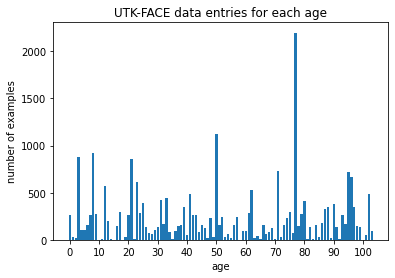

Max value: 99


In [121]:
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.xticks(np.arange(0, 110, step=10), np.arange(0, 110, step=10))
plt.xlabel('age')
plt.ylabel('number of examples')
plt.title('UTK-FACE data entries for each age')
plt.savefig("ages.png")
plt.show()
print("Max value:",max(ages))

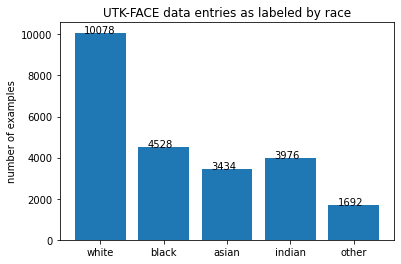

In [195]:
x_race = range(5)
y_race = whitecount, blackcount, asiancount, indiancount, othercount
plt.xticks(x_race, ['white', 'black', 'asian', 'indian', 'other'])
plt.ylabel('number of examples')
plt.title('UTK-FACE data entries as labeled by race')
plt.bar(x_race,y_race)
# Text on the top of each bar
for i in x_race:
    plt.text(i-0.25 , y_race[i]+0.15, s = str(y_race[i]), size = 10)
    
plt.savefig("utkrace.png")
plt.show()

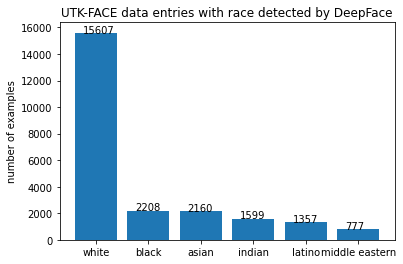

In [194]:
x_race = range(6)
y_race = df_whitecount, df_blackcount, df_asiancount, df_indiancount, df_latinocount, df_mideastcount
plt.xticks(x_race, ['white', 'black', 'asian', 'indian', 'latino', 'middle eastern'])
plt.ylabel('number of examples')
plt.title('UTK-FACE data entries with race detected by DeepFace')
plt.bar(x_race,y_race)

# Text on the top of each bar
for i in x_race:
    plt.text(i-0.25 , y_race[i]+0.15, s = str(y_race[i]), size = 10)
    
plt.savefig("dfrace.png")    
plt.show()

In [43]:
#count demographic spread of DeepFace detected race for images labeled 'other' in UTK Face
dfother_asiancount = 0
dfother_whitecount = 0
dfother_mideastcount = 0
dfother_indiancount = 0
dfother_latinocount = 0
dfother_blackcount = 0
for i in race_other_images:
    if i == 'white':
        dfother_whitecount+=1
    if i == 'black':
        dfother_blackcount+=1
    if i == 'asian':
        dfother_asiancount+=1
    if i == 'indian':
        dfother_indiancount+=1
    if i == 'latino hispanic':
        dfother_latinocount+=1
    if i == 'middle eastern':
        dfother_mideastcount+=1

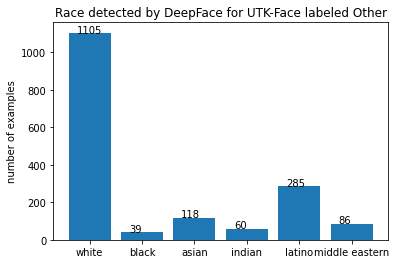

In [44]:
x_race = range(6)
y_race = dfother_whitecount, dfother_blackcount, dfother_asiancount, dfother_indiancount, dfother_latinocount, dfother_mideastcount
plt.xticks(x_race, ['white', 'black', 'asian', 'indian', 'latino', 'middle eastern'])
plt.ylabel('number of examples')
plt.title('Race detected by DeepFace for UTK-Face labeled Other')
plt.bar(x_race,y_race)

# Text on the top of each bar
for i in x_race:
    plt.text(i-0.25 , y_race[i]+0.15, s = str(y_race[i]), size = 10)
    
plt.savefig("dfrace_other.png")    
plt.show()

In [57]:
#Replace 'other' with detected race
race_plusdetected = race_txt.copy()

for i in range(len(race_other_images)):
    idx = other[i]
    race_plusdetected[idx] = race_other_images[i]

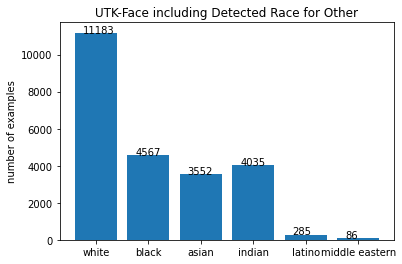

In [63]:
#count demographic spread in revised dataset
revised_asiancount = 0
revised_whitecount = 0
revised_mideastcount = 0
revised_indiancount = 0
revised_latinocount = 0
revised_blackcount = 0
for i in race_plusdetected:
    if i == 'white':
        revised_whitecount+=1
    if i == 'black':
        revised_blackcount+=1
    if i == 'asian':
        revised_asiancount+=1
    if i == 'indian':
        revised_indiancount+=1
    if i == 'latino hispanic':
        revised_latinocount+=1
    if i == 'middle eastern':
        revised_mideastcount+=1
#show plot
x_race = range(6)
y_race = revised_whitecount, revised_blackcount, revised_asiancount, revised_indiancount, revised_latinocount, revised_mideastcount
plt.xticks(x_race, ['white', 'black', 'asian', 'indian', 'latino', 'middle eastern'])
plt.ylabel('number of examples')
plt.title('UTK-Face including Detected Race for Other')
plt.bar(x_race,y_race)

# Text on the top of each bar
for i in x_race:
    plt.text(i-0.25 , y_race[i]+0.15, s = str(y_race[i]), size = 10)
    
plt.savefig("revisedrace.png")    
plt.show()

In [9]:
#Isolate images labeled as 'white'
white_idx = np.where(np.array(race)=='0')[0]
white_images = [images[i] for i in white_idx]
white_ages = [ages[i] for i in white_idx]
white_ages_int = [int(i) for i in white_ages]

#Isolate images labeled as 'black'
black_idx = np.where(np.array(race)=='1')[0]
black_images = [images[i] for i in black_idx]
black_ages = [ages[i] for i in black_idx]
black_ages_int = [int(i) for i in black_ages]

#Isolate images labeled as 'asian'
asian_idx = np.where(np.array(race)=='2')[0]
asian_images = [images[i] for i in asian_idx]
asian_ages = [ages[i] for i in asian_idx]
asian_ages_int = [int(i) for i in asian_ages]

#Isolate images labeled as 'indian'
indian_idx = np.where(np.array(race)=='3')[0]
indian_images = [images[i] for i in indian_idx]
indian_ages = [ages[i] for i in indian_idx]
indian_ages_int = [int(i) for i in indian_ages]

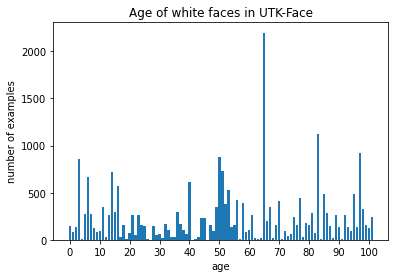

Average value: 37.98 Median value 35.0 Max value: 99 Min value: 1


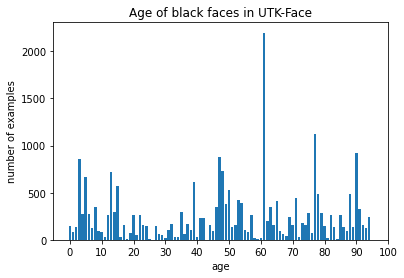

Average value: 33.86 Median value 30.0 Max value: 99 Min value: 1


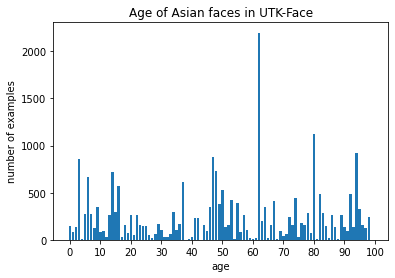

Average value: 25.87 Median value 26.0 Max value: 99 Min value: 1


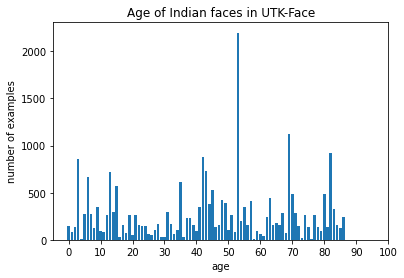

Average value: 31.53 Median value 28.0 Max value: 96 Min value: 1


In [10]:
#plot age distribution within each racial category
#plt.subplot(1, 2, 1)
x_ages = list(set(white_ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.xticks(np.arange(0, 110, step=10), np.arange(0, 110, step=10))
plt.xlabel('age')
plt.ylabel('number of examples')
plt.title('Age of white faces in UTK-Face')
plt.savefig("white_ages.png")
plt.show()
print("Average value:",np.around(np.mean(white_ages_int),2), "Median value",np.median(white_ages_int), 
      "Max value:",max(white_ages), "Min value:",min(white_ages))

#plt.subplot(1, 2, 2)
x_ages = list(set(black_ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.xticks(np.arange(0, 110, step=10), np.arange(0, 110, step=10))
plt.xlabel('age')
plt.ylabel('number of examples')
plt.title('Age of black faces in UTK-Face')
plt.savefig("black_ages.png")
plt.show()
print("Average value:",np.around(np.mean(black_ages_int),2), "Median value",np.median(black_ages_int), 
      "Max value:",max(black_ages), "Min value:",min(black_ages))

#plt.subplot(2, 2, 1)
x_ages = list(set(asian_ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.xticks(np.arange(0, 110, step=10), np.arange(0, 110, step=10))
plt.xlabel('age')
plt.ylabel('number of examples')
plt.title('Age of Asian faces in UTK-Face')
plt.savefig("asian_ages.png")
plt.show()
print("Average value:",np.around(np.mean(asian_ages_int),2), "Median value",np.median(asian_ages_int), 
      "Max value:",max(asian_ages), "Min value:", min(asian_ages))

#plt.subplot(2, 2, 2)
x2_ages = list(set(indian_ages))
y2_ages = [ages.count(i) for i in x2_ages]
plt.bar(x2_ages,y2_ages)
plt.xticks(np.arange(0, 110, step=10), np.arange(0, 110, step=10))
plt.xlabel('age')
plt.ylabel('number of examples')
plt.title('Age of Indian faces in UTK-Face')
plt.savefig("indian_ages.png")
plt.show()
print("Average value:",np.around(np.mean(indian_ages_int),2), "Median value",np.median(indian_ages_int), 
      "Max value:",max(indian_ages), "Min value:", min(indian_ages))

In [11]:
#randomly sample the images to obtain 2000 samples for each race
white_sample_idx = random.sample(range(len(white_images)), 2000)
white_sample_images = [white_images[i] for i in white_sample_idx]
white_sample_ages = [white_ages[i] for i in white_sample_idx]

black_sample_idx = random.sample(range(len(black_images)), 2000)
black_sample_images = [black_images[i] for i in black_sample_idx]
black_sample_ages = [black_ages[i] for i in black_sample_idx]

asian_sample_idx = random.sample(range(len(asian_images)), 2000)
asian_sample_images = [asian_images[i] for i in asian_sample_idx]
asian_sample_ages = [asian_ages[i] for i in asian_sample_idx]

indian_sample_idx = random.sample(range(len(indian_images)), 2000)
indian_sample_images = [indian_images[i] for i in indian_sample_idx]
indian_sample_ages = [indian_ages[i] for i in indian_sample_idx]

#Save random sample indices as CSV file
np.savetxt('sample_idx.csv', np.c_[white_sample_idx,black_sample_idx,asian_sample_idx,indian_sample_idx],delimiter =", ")

In [12]:
#Age detection using DeepFace for images labeled 'asian'
asian_detectedage = []
for i in asian_sample_images: 
    obj = DeepFace.analyze(img_path = i, actions = ['age'], enforce_detection=False)
    asian_detectedage.append(obj["age"])

print(asian_detectedage)

[38, 26, 30, 30, 46, 33, 26, 33, 24, 29, 32, 33, 29, 29, 27, 32, 29, 28, 24, 27, 26, 23, 37, 41, 25, 31, 26, 27, 38, 26, 30, 31, 30, 28, 27, 29, 25, 28, 39, 31, 32, 35, 22, 29, 26, 29, 25, 27, 30, 34, 29, 26, 37, 27, 34, 38, 39, 28, 33, 31, 26, 26, 33, 26, 27, 29, 28, 38, 35, 45, 27, 28, 36, 29, 30, 26, 31, 27, 29, 27, 25, 29, 28, 28, 33, 29, 28, 28, 31, 25, 30, 24, 26, 29, 27, 45, 19, 24, 29, 37, 25, 28, 23, 24, 27, 26, 24, 25, 28, 29, 44, 23, 29, 32, 30, 37, 26, 25, 26, 30, 24, 28, 32, 29, 46, 27, 28, 44, 27, 29, 23, 42, 30, 28, 38, 30, 26, 22, 32, 31, 25, 25, 28, 29, 41, 29, 28, 32, 24, 27, 28, 26, 25, 27, 38, 24, 30, 38, 35, 33, 33, 29, 26, 27, 27, 23, 33, 27, 33, 23, 41, 27, 29, 31, 37, 28, 15, 30, 25, 33, 26, 35, 41, 48, 30, 30, 30, 23, 27, 52, 26, 27, 26, 30, 40, 27, 31, 29, 28, 26, 26, 25, 30, 29, 29, 23, 22, 32, 30, 22, 31, 28, 26, 25, 26, 23, 30, 44, 43, 27, 28, 32, 25, 24, 51, 25, 24, 29, 30, 28, 25, 31, 26, 59, 33, 33, 25, 26, 26, 37, 42, 23, 24, 31, 24, 29, 24, 29, 33, 25,

In [13]:
#Age detection using DeepFace for images labeled 'white'
white_detectedage = []
for i in white_sample_images: 
    obj = DeepFace.analyze(img_path = i, actions = ['age'], enforce_detection=False)
    white_detectedage.append(obj["age"])

print(white_detectedage)

[37, 28, 27, 26, 33, 27, 37, 34, 28, 30, 26, 32, 29, 29, 31, 26, 27, 27, 42, 50, 34, 27, 36, 39, 25, 28, 29, 51, 34, 46, 30, 31, 37, 26, 26, 54, 45, 36, 37, 46, 43, 26, 20, 28, 40, 30, 51, 28, 27, 26, 28, 25, 28, 39, 28, 32, 29, 26, 35, 37, 28, 23, 36, 46, 39, 31, 36, 24, 28, 39, 29, 29, 37, 27, 27, 29, 30, 24, 32, 43, 36, 34, 46, 40, 49, 42, 40, 48, 27, 53, 29, 23, 42, 33, 40, 25, 28, 27, 31, 30, 29, 36, 28, 27, 27, 36, 25, 48, 29, 30, 34, 33, 28, 30, 34, 32, 29, 39, 39, 32, 30, 30, 24, 40, 35, 31, 29, 27, 39, 44, 42, 29, 47, 49, 34, 29, 28, 30, 34, 53, 37, 32, 28, 25, 29, 28, 43, 26, 50, 27, 40, 27, 32, 27, 45, 42, 32, 25, 35, 28, 28, 31, 28, 53, 26, 26, 36, 29, 23, 36, 35, 35, 32, 28, 25, 32, 37, 41, 40, 46, 32, 50, 35, 23, 41, 37, 30, 28, 29, 37, 28, 26, 28, 40, 27, 45, 32, 26, 30, 34, 24, 27, 26, 38, 25, 28, 31, 23, 29, 27, 24, 35, 29, 30, 36, 26, 23, 31, 31, 42, 36, 27, 31, 30, 32, 39, 30, 30, 42, 28, 29, 52, 28, 21, 29, 40, 33, 26, 30, 27, 28, 32, 30, 35, 25, 28, 37, 33, 26, 27,

In [14]:
#Age detection using DeepFace for images labeled 'black'
black_detectedage = []
for i in black_sample_images: 
    obj = DeepFace.analyze(img_path = i, actions = ['age'], enforce_detection=False)
    black_detectedage.append(obj["age"])

print(black_detectedage)

[29, 34, 35, 34, 24, 29, 23, 32, 35, 26, 25, 27, 32, 28, 32, 28, 29, 30, 28, 28, 54, 42, 25, 24, 28, 29, 45, 28, 26, 36, 26, 29, 31, 31, 24, 30, 30, 28, 25, 32, 26, 26, 32, 28, 44, 23, 43, 34, 24, 29, 23, 25, 24, 39, 31, 25, 31, 35, 29, 34, 39, 28, 25, 33, 26, 29, 31, 33, 24, 35, 30, 41, 60, 39, 28, 31, 22, 25, 23, 34, 24, 33, 26, 44, 29, 20, 34, 21, 39, 24, 31, 27, 29, 39, 25, 30, 47, 42, 24, 29, 26, 31, 33, 25, 28, 28, 24, 26, 24, 26, 31, 26, 27, 31, 28, 34, 35, 26, 36, 44, 27, 42, 24, 29, 29, 24, 29, 44, 24, 32, 30, 28, 34, 32, 24, 27, 26, 27, 41, 34, 30, 27, 23, 37, 37, 36, 31, 31, 32, 40, 24, 44, 36, 25, 30, 32, 26, 26, 25, 34, 29, 30, 32, 25, 40, 24, 26, 29, 26, 39, 35, 29, 27, 33, 32, 25, 37, 27, 38, 33, 23, 31, 28, 29, 25, 41, 27, 27, 30, 49, 37, 35, 29, 44, 26, 29, 25, 27, 28, 36, 25, 37, 44, 32, 26, 31, 28, 39, 25, 28, 31, 36, 26, 28, 25, 28, 24, 29, 27, 39, 27, 30, 25, 28, 26, 27, 27, 49, 30, 50, 27, 51, 27, 37, 31, 29, 25, 33, 32, 24, 25, 31, 29, 44, 24, 34, 24, 31, 26, 30,

In [15]:
#Age detection using DeepFace for images labeled 'indian'
indian_detectedage = []
for i in indian_sample_images: 
    obj = DeepFace.analyze(img_path = i, actions = ['age'], enforce_detection=False)
    indian_detectedage.append(obj["age"])

print(indian_detectedage)

[22, 38, 24, 27, 27, 36, 29, 28, 37, 27, 24, 25, 26, 30, 32, 28, 42, 28, 42, 23, 23, 30, 46, 39, 29, 47, 28, 26, 40, 29, 30, 33, 30, 32, 38, 28, 30, 25, 27, 24, 22, 25, 31, 27, 27, 30, 25, 28, 28, 32, 35, 33, 29, 32, 26, 27, 21, 22, 27, 47, 27, 27, 30, 26, 28, 27, 39, 26, 32, 46, 29, 26, 22, 41, 30, 35, 41, 32, 42, 29, 25, 33, 26, 24, 27, 44, 25, 28, 33, 38, 29, 27, 40, 30, 31, 36, 34, 26, 26, 34, 30, 28, 30, 33, 33, 53, 36, 44, 38, 33, 32, 24, 28, 28, 28, 27, 35, 26, 29, 40, 36, 47, 29, 27, 35, 49, 26, 23, 27, 30, 32, 26, 29, 33, 40, 26, 26, 27, 38, 28, 31, 28, 32, 27, 34, 26, 36, 31, 27, 27, 24, 24, 26, 30, 24, 33, 36, 30, 29, 27, 28, 33, 25, 31, 27, 23, 28, 33, 23, 33, 25, 33, 29, 25, 35, 40, 25, 26, 39, 29, 34, 27, 44, 23, 31, 26, 30, 24, 31, 23, 24, 28, 26, 24, 30, 32, 42, 30, 41, 31, 30, 38, 33, 27, 31, 26, 29, 28, 28, 28, 23, 29, 26, 29, 29, 36, 42, 24, 31, 43, 30, 24, 44, 26, 30, 28, 25, 33, 30, 28, 24, 30, 28, 29, 30, 38, 29, 31, 39, 30, 28, 46, 31, 24, 26, 29, 33, 28, 29, 32,

In [16]:
#Save DeepFace predicted age as CSV file
np.savetxt('df_ages.csv', np.c_[white_detectedage,black_detectedage,asian_detectedage,indian_detectedage],delimiter =", ")

In [25]:
#divide ages into buckets with range of 5

indian_detectedbuckets=[]
indian_truebuckets=[]
for i in indian_detectedage:
    bucket = 5 * round(i/5)
    indian_detectedbuckets.append(bucket)
for i in indian_sample_ages:
    i = int(i)
    bucket = 5 * round(i/5)
    indian_truebuckets.append(bucket)
indian_accuracy=metrics.accuracy_score(indian_truebuckets, indian_detectedbuckets)
print('indian accuracy',indian_accuracy)

asian_detectedbuckets=[]
asian_truebuckets=[]
for i in asian_detectedage:
    bucket = 5 * round(i/5)
    asian_detectedbuckets.append(bucket)
for i in asian_sample_ages:
    i = int(i)
    bucket = 5 * round(i/5)
    asian_truebuckets.append(bucket)
asian_accuracy=metrics.accuracy_score(asian_truebuckets, asian_detectedbuckets)
print('asian accuracy',asian_accuracy)

white_detectedbuckets=[]
white_truebuckets=[]
for i in white_detectedage:
    bucket = 5 * round(i/5)
    white_detectedbuckets.append(bucket)
for i in white_sample_ages:
    i = int(i)
    bucket = 5 * round(i/5)
    white_truebuckets.append(bucket)
white_accuracy=metrics.accuracy_score(white_truebuckets, white_detectedbuckets)
print('white accuracy',white_accuracy)

black_detectedbuckets=[]
black_truebuckets=[]
for i in black_detectedage:
    bucket = 5 * round(i/5)
    black_detectedbuckets.append(bucket)
for i in black_sample_ages:
    i = int(i)
    bucket = 5 * round(i/5)
    black_truebuckets.append(bucket)
black_accuracy=metrics.accuracy_score(black_truebuckets, black_detectedbuckets)
print('black accuracy',black_accuracy)

indian accuracy 0.1765
asian accuracy 0.1925
white accuracy 0.1195
black accuracy 0.224


In [26]:
#Save true age buckets as CSV file
np.savetxt('true_age_buckets.csv', np.c_[white_truebuckets,black_truebuckets,asian_truebuckets,indian_truebuckets],delimiter =", ")
#Save DeepFace predicted age buckets as CSV file
np.savetxt('df_age_buckets.csv', np.c_[white_detectedbuckets,black_detectedbuckets,asian_detectedbuckets,indian_detectedbuckets],delimiter =", ")

In [28]:
#calculate other metrics for age prediction
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#white_sample_ages = [int(i) for i in white_truebuckets]
mae_white=metrics.mean_absolute_error(white_truebuckets, white_detectedbuckets)
rmse_white=np.sqrt(metrics.mean_squared_error(white_truebuckets, white_detectedbuckets))
r2_white=metrics.r2_score(white_truebuckets, white_detectedbuckets)
#mape_white = mean_absolute_percentage_error(np.array(white_sample_ages), np.array(white_detectedage))
print('WHITE FACES', 'mae:',mae_white,'rmse:',rmse_white,'r2:',r2_white)

#asian_sample_ages = [int(i) for i in asian_sample_ages]
mae_asian=metrics.mean_absolute_error(asian_truebuckets, asian_detectedbuckets)
rmse_asian=np.sqrt(metrics.mean_squared_error(asian_truebuckets, asian_detectedbuckets))
r2_asian=metrics.r2_score(asian_truebuckets, asian_detectedbuckets)
#mape_asian = mean_absolute_percentage_error(np.array(asian_sample_ages), np.array(asian_detectedage))
print('ASIAN FACES', 'mae:',mae_asian,'rmse:',rmse_asian,'r2:',r2_asian)

black_sample_ages = [int(i) for i in black_sample_ages]
mae_black=metrics.mean_absolute_error(black_truebuckets, black_detectedbuckets)
rmse_black=np.sqrt(metrics.mean_squared_error(black_truebuckets, black_detectedbuckets))
r2_black=metrics.r2_score(black_truebuckets, black_detectedbuckets)
#mape_black = mean_absolute_percentage_error(np.array(black_sample_ages), np.array(black_detectedage))
print('BLACK FACES', 'mae:',mae_black,'rmse:',rmse_black,'r2:',r2_black)

#indian_sample_ages = [int(i) for i in indian_sample_ages]
mae_indian=metrics.mean_absolute_error(indian_truebuckets, indian_detectedbuckets)
rmse_indian=np.sqrt(metrics.mean_squared_error(indian_truebuckets, indian_detectedbuckets))
r2_indian=metrics.r2_score(indian_truebuckets, indian_detectedbuckets)
#mape_indian = mean_absolute_percentage_error(np.array(indian_sample_ages), np.array(indian_detectedage))
print('INDIAN FACES', 'mae:',mae_indian,'rmse:',rmse_indian,'r2:',r2_indian)

WHITE FACES mae: 15.9825 rmse: 20.58792121609173 r2: 0.13306944307042878
ASIAN FACES mae: 13.935 rmse: 18.96048522585854 r2: 0.16227598255582454
BLACK FACES mae: 9.6675 rmse: 13.968267609120325 r2: 0.14652534276775786
INDIAN FACES mae: 11.7925 rmse: 15.764279241373517 r2: 0.15929307292547967


In [186]:
print('white samples:',white_sample_ages[0:5], white_detectedage[0:5])
print('black samples:',black_sample_ages[0:5], black_detectedage[0:5])
print('asian samples:',asian_sample_ages[0:5], asian_detectedage[0:5])
print('indian samples:',indian_sample_ages[0:5], indian_detectedage[0:5])

white samples: [82, 80, 15, 52, 80] [47, 28, 29, 31, 45]
black samples: [29, 35, 26, 28, 24] [25, 25, 24, 41, 29]
asian samples: [5, 1, 23, 1, 4] [25, 27, 33, 28, 36]
indian samples: [70, 58, 28, 40, 1] [33, 30, 25, 38, 25]


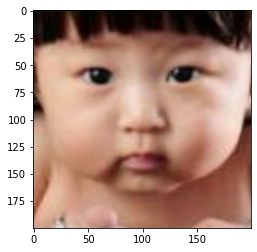

In [189]:
plt.imshow(asian_sample_images[3])
plt.savefig("asian_example.png")